## Import Required Libraries

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Set figure size for better visualization
plt.rcParams['figure.figsize'] = (15, 10)

## Load the Image

Image shape: (481, 321, 3)
Image dtype: uint8


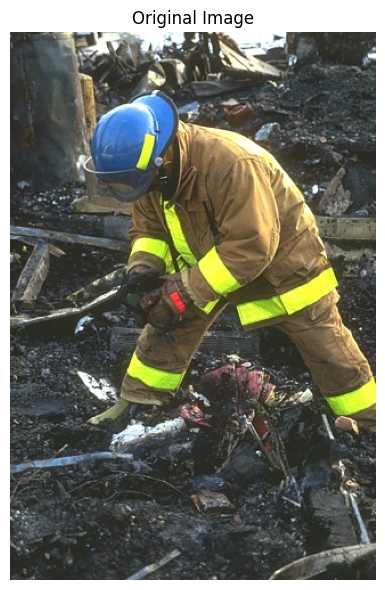

In [27]:
# Load the image
image_path = 'assets/removebg/0056.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(f"Image shape: {image.shape}")
print(f"Image dtype: {image.dtype}")

# Display original image
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.tight_layout()
plt.show()

## GrabCut Algorithm

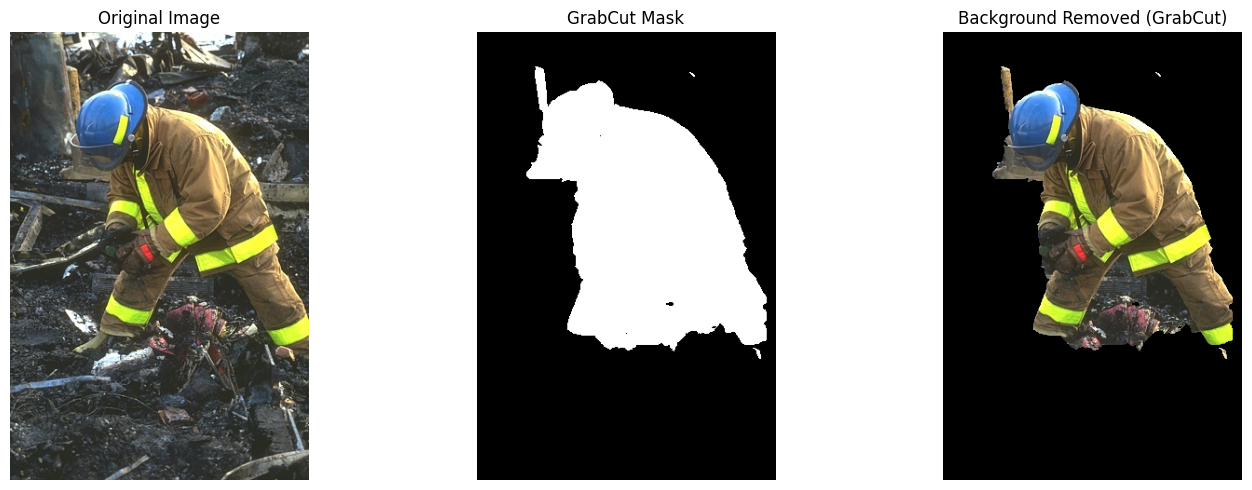

In [28]:
# Create a copy for processing
img_grabcut = image.copy()

# Create mask for GrabCut
mask = np.zeros(img_grabcut.shape[:2], np.uint8)

# Background and foreground models (required by GrabCut)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a rectangle around the foreground object
# Adjust these values based on your image
height, width = img_grabcut.shape[:2]
rect = (10, 10, width-20, height-20)

# Apply GrabCut algorithm
cv2.grabCut(img_grabcut, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Create binary mask where 0 and 2 are background, 1 and 3 are foreground
mask_grabcut = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply mask to get the result
result_grabcut = image_rgb * mask_grabcut[:, :, np.newaxis]

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mask_grabcut, cmap='gray')
axes[1].set_title('GrabCut Mask')
axes[1].axis('off')

axes[2].imshow(result_grabcut)
axes[2].set_title('Background Removed (GrabCut)')
axes[2].axis('off')

plt.tight_layout()
plt.show()